In [23]:
from bs4 import BeautifulSoup
import networkx as nx

In [33]:
G = nx.Graph()

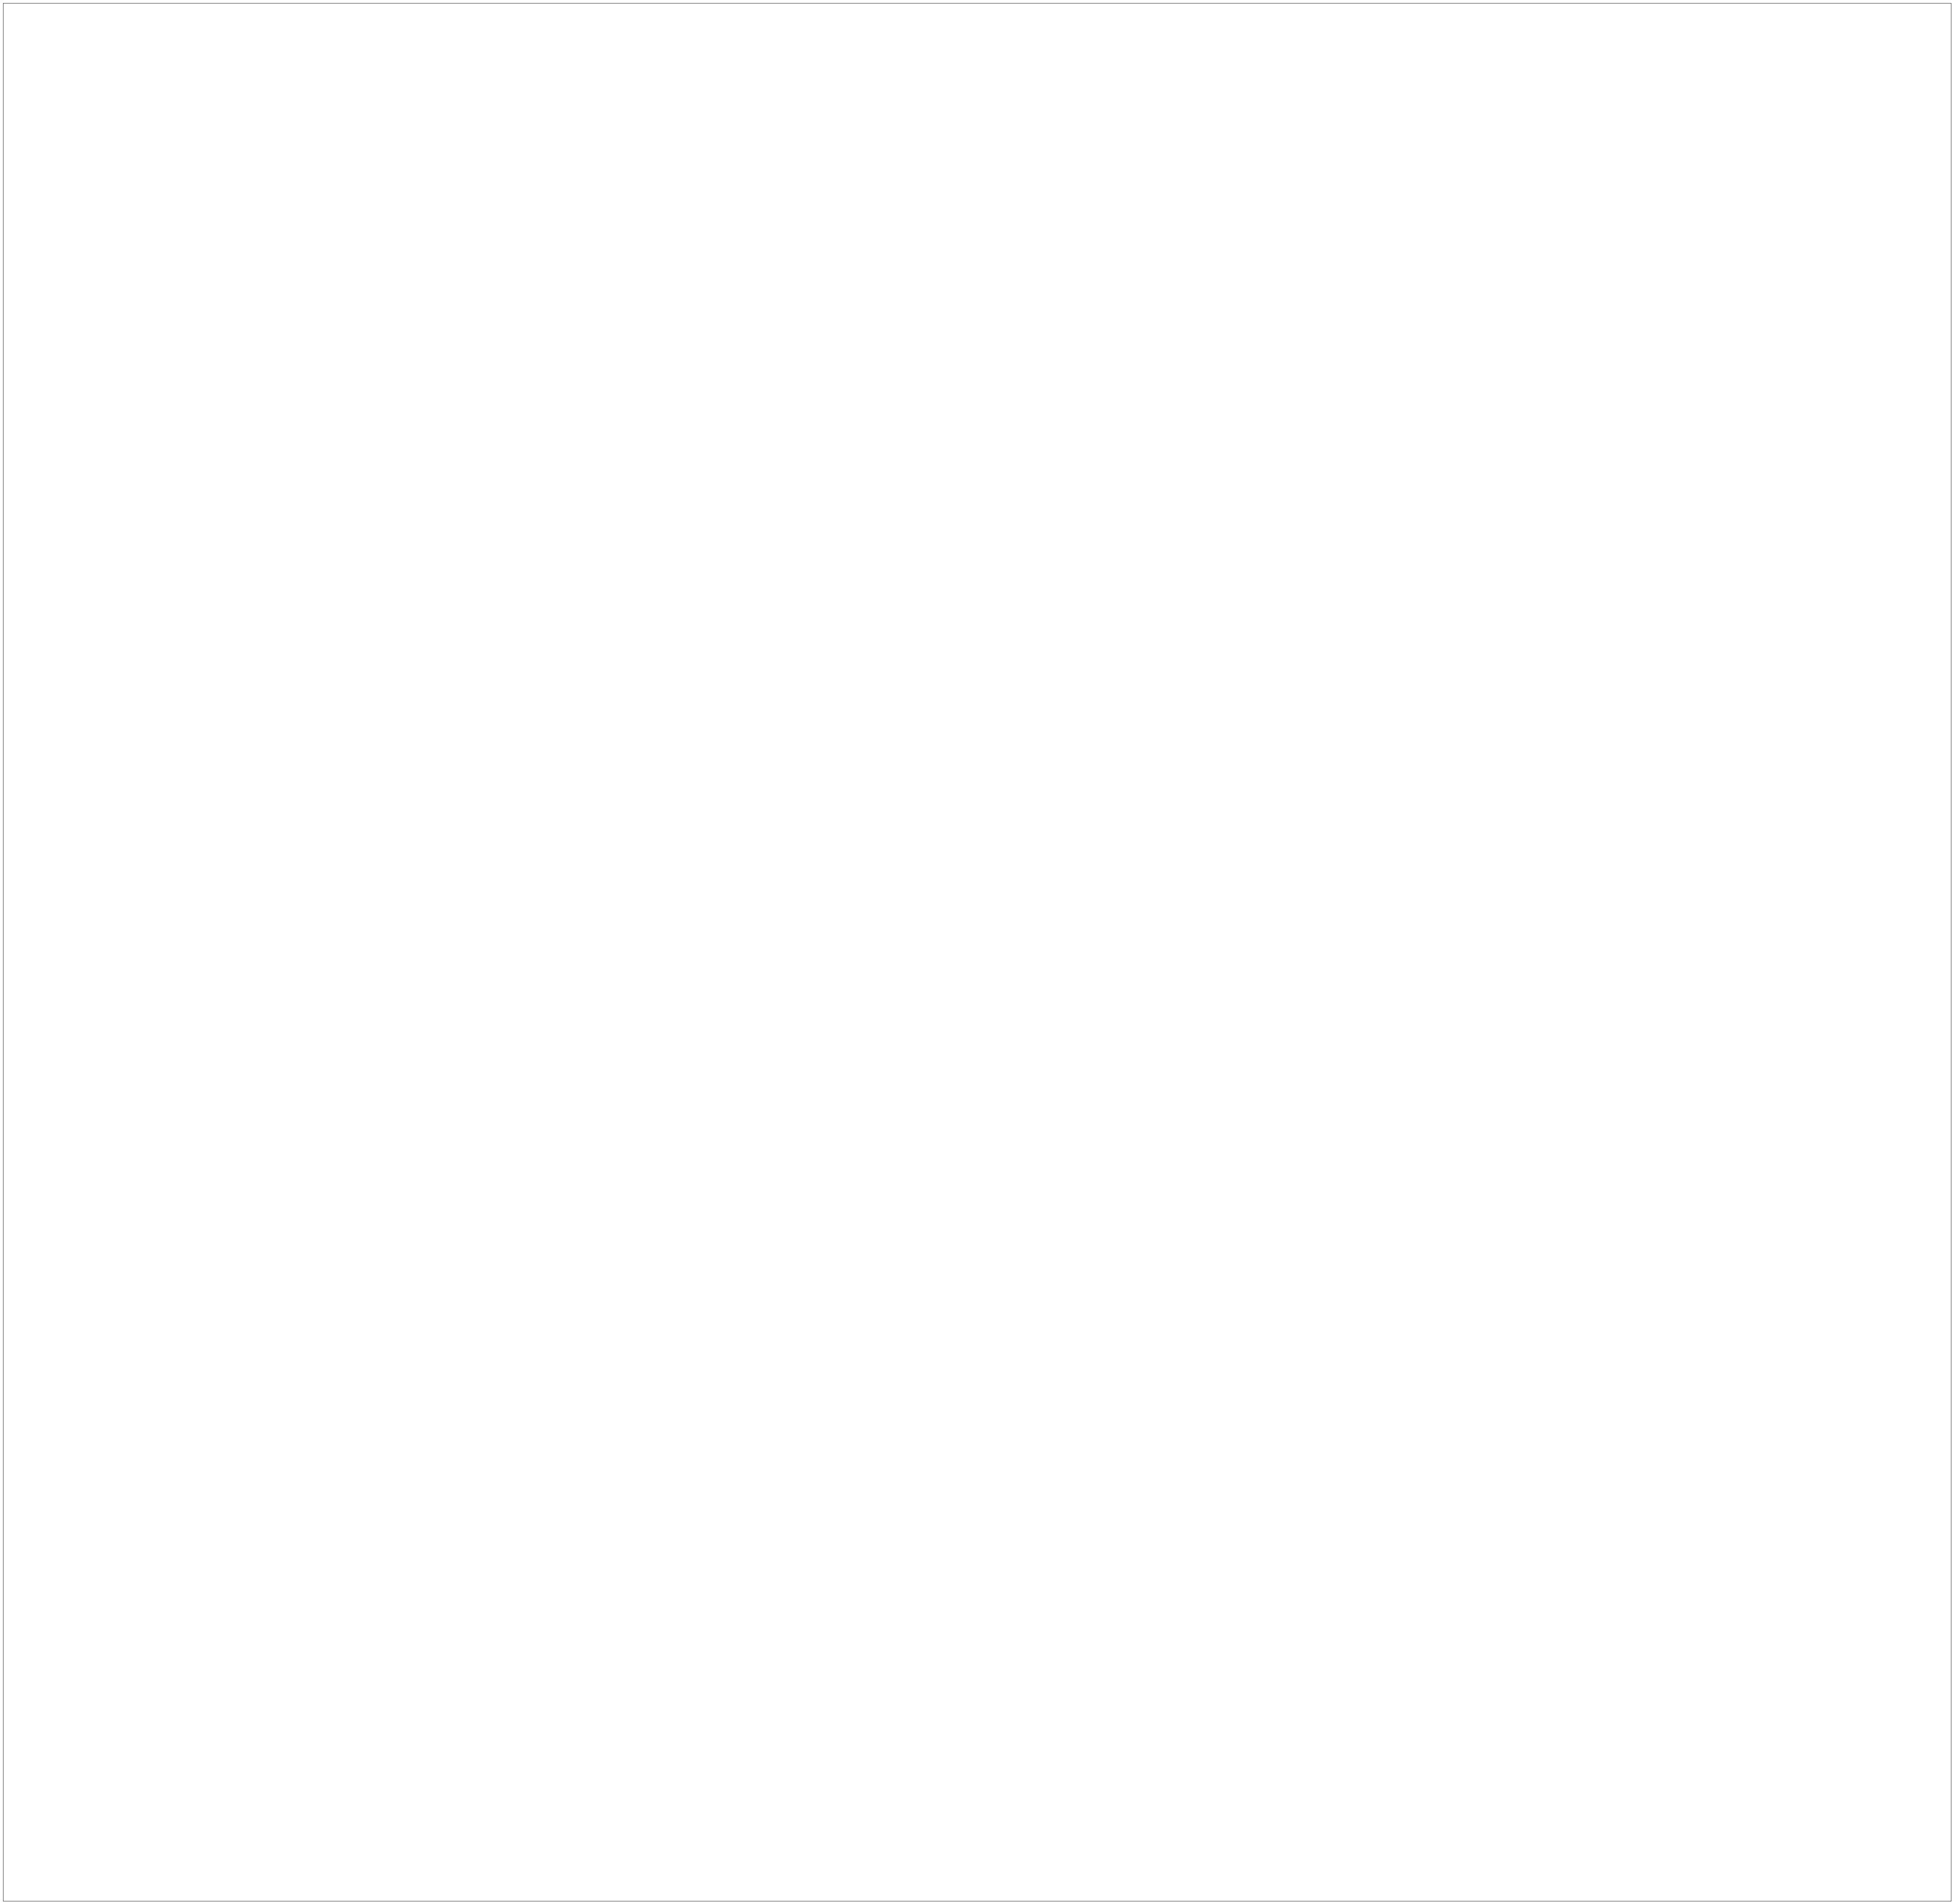

In [6]:
import matplotlib.pyplot as plt
# G =nx.random_graphs.barabasi_albert_graph(100,1)
# nx.draw(G)

plt.figure(figsize=(80,80))

graph_pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, graph_pos, node_size=10, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=8, font_family='sans-serif')

# plt.show()
# plt.savefig("Tactic_Technique.pdf")
# plt.savefig("Tactic_Technique_Reference.pdf")
plt.savefig("Tactic_Technique_Reference_Example.pdf")

In [38]:
# Save graph
# nx.write_gml(G, "mitre_attack.gml")
# nx.write_gml(G, "Tactic_Technique.gml")
# nx.write_gml(G, "Tactic_Technique_Reference.gml")
nx.write_gml(G, "Tactic_Technique_Reference_Example.gml")

In [3]:
# Read graph
G = nx.read_gml('Tactic_Technique_Reference_Example.gml')

In [25]:
soup = BeautifulSoup(open(r"mitre_html/MITRE ATT&CK.html"))

table = soup.find_all("table")[1]

In [8]:
table

<table class="techniques-table">
<!-- tour technique is scheduled task under privilege escalation -->
<tr class="technique-row">
<td>
<table class="supertechnique">
<tr>
<td class="technique">
<div class="technique-cell supertechniquecell" id="technique-cell--x-mitre-tactic--daa4cbb1-b4f4-4723-a824-7f1efd6e0592--attack-pattern--67073dde-d720-45ae-83da-b12d5e73ca3b">
<a data-animation="false" data-container="#technique-cell--x-mitre-tactic--daa4cbb1-b4f4-4723-a824-7f1efd6e0592--attack-pattern--67073dde-d720-45ae-83da-b12d5e73ca3b" data-placement="top" data-toggle="tooltip" href="/techniques/T1595" title="T1595">Active Scanning <sub>(2)</sub></a>
</div>
</td>
</tr>
</table>
</td>
<td class="sidebar sidebar--x-mitre-tactic--daa4cbb1-b4f4-4723-a824-7f1efd6e0592--attack-pattern--67073dde-d720-45ae-83da-b12d5e73ca3b" onclick="matrix_toggle_technique('x-mitre-tactic--daa4cbb1-b4f4-4723-a824-7f1efd6e0592', 'attack-pattern--67073dde-d720-45ae-83da-b12d5e73ca3b');">
<div class="angle top">
<svg 

In [34]:
# Add tactics to Graph

tactic_list = []

head = table.find("thead")
for head_content in head.find_all("a"):
    tactic_name = head_content.text
    tactic_url = head_content['href']
    tactic_list.append(tactic_url)
    print(tactic_url)
    
    G.add_node(tactic_url, name=tactic_name, types='tactic')

/tactics/TA0043
/tactics/TA0042
/tactics/TA0001
/tactics/TA0002
/tactics/TA0003
/tactics/TA0004
/tactics/TA0005
/tactics/TA0006
/tactics/TA0007
/tactics/TA0008
/tactics/TA0009
/tactics/TA0011
/tactics/TA0010
/tactics/TA0040


In [35]:
# Add techniques to Graph

body = table.find("tbody")
tactic_count = 0

for body_content in body.find_all('table', {'class': 'techniques-table'}):
    tactic = tactic_list[tactic_count]
    tactic_count += 1
    print(tactic)
    
    print(len(body_content.find_all('table', {'class': 'supertechnique'})))
    
    for technique_row in body_content.find_all('tr', {'class': 'technique-row'}):
#         technique_list = []
        super_technique = technique_row.find_all('table', {'class': 'supertechnique'})
        is_super_technique = len(super_technique) # this value is zero when there is no sub-technique.
#         print(is_super_technique) 
        if is_super_technique:
            super_technique_name = super_technique[0].find('a').text
            super_technique_url = super_technique[0].find('a')['href']
            print(super_technique_url)
            G.add_node(super_technique_url, name=super_technique_name, types='super_technique')
            G.add_edge(super_technique_url, tactic, type='belong to')
            
            for sub_technique in technique_row.find_all('div', {'class': 'subtechnique'}):
                sub_technique_name = sub_technique.find('a').text
                sub_technique_url = sub_technique.find('a')['href']
                print(sub_technique_url)
                G.add_node(sub_technique_url, name=sub_technique_name, types='sub_technique')
                G.add_edge(sub_technique_url, super_technique_url, types='belong to')
        else:
            technique_name = technique_row.find('a').text
            technique_url = technique_row.find('a')['href']
            print(technique_url)
            G.add_node(technique_url, name=technique_name, types='technique')
            G.add_edge(technique_url, tactic, types='belong to')

/tactics/TA0043
9
/techniques/T1595
/techniques/T1595/001
/techniques/T1595/002
/techniques/T1592
/techniques/T1592/001
/techniques/T1592/002
/techniques/T1592/003
/techniques/T1592/004
/techniques/T1589
/techniques/T1589/001
/techniques/T1589/002
/techniques/T1589/003
/techniques/T1590
/techniques/T1590/001
/techniques/T1590/002
/techniques/T1590/003
/techniques/T1590/004
/techniques/T1590/005
/techniques/T1590/006
/techniques/T1591
/techniques/T1591/002
/techniques/T1591/001
/techniques/T1591/003
/techniques/T1591/004
/techniques/T1598
/techniques/T1598/001
/techniques/T1598/002
/techniques/T1598/003
/techniques/T1597
/techniques/T1597/001
/techniques/T1597/002
/techniques/T1596
/techniques/T1596/002
/techniques/T1596/001
/techniques/T1596/003
/techniques/T1596/004
/techniques/T1596/005
/techniques/T1593
/techniques/T1593/001
/techniques/T1593/002
/techniques/T1594
/tactics/TA0042
6
/techniques/T1583
/techniques/T1583/001
/techniques/T1583/002
/techniques/T1583/003
/techniques/T1583/

In [36]:
# Add URLs to Graph

import requests

techniques_list = list(G.nodes())

for techniques_url in techniques_list:
#     print(G.nodes[techniques]['url'])
    if techniques_url.find('technique') != -1:
        print('https://attack.mitre.org' + techniques_url)
        technique_html = requests.get('https://attack.mitre.org' + techniques_url).text
        
        soup = BeautifulSoup(technique_html)
        for reference in soup.find_all('span', {'class': 'scite-citation'}):
            try:
                reference_name = reference.find('a').text
                reference_url = reference.find('a')['href']
            except:
                continue
            print(reference_url)
            G.add_node(reference_url, label=reference_name, types='reference')
            G.add_edge(reference_url, techniques_url, types='used')

https://attack.mitre.org/techniques/T1595
https://www.caida.org/publications/papers/2012/analysis_slash_zero/analysis_slash_zero.pdf
https://wiki.owasp.org/index.php/OAT-004_Fingerprinting
https://attack.mitre.org/techniques/T1595/001
https://www.caida.org/publications/papers/2012/analysis_slash_zero/analysis_slash_zero.pdf
https://attack.mitre.org/techniques/T1595/002
https://wiki.owasp.org/index.php/OAT-014_Vulnerability_Scanning
https://documents.trendmicro.com/assets/white_papers/wp-pawn-storm-in-2019.pdf
https://www.justice.gov/opa/press-release/file/1328521/download
https://media.kasperskycontenthub.com/wp-content/uploads/sites/43/2015/03/20082004/volatile-cedar-technical-report.pdf
https://www.clearskysec.com/wp-content/uploads/2021/01/Lebanese-Cedar-APT.pdf
https://attack.mitre.org/techniques/T1592
https://cybersecurity.att.com/blogs/labs-research/scanbox-a-reconnaissance-framework-used-on-watering-hole-attacks
https://attack.mitre.org/techniques/T1592/001
https://cybersecurity

In [37]:
import requests

technique_count = 0
technique_with_example_count = 0

for techniques in list(G.nodes()):
    if G.nodes[techniques]['types'].find('technique') != -1:
        technique_url = 'https://attack.mitre.org' + techniques
#         print(technique_url)
        technique_html = requests.get(technique_url).text
        technique_count += 1
        
#         pe_file = open("./data/"+ techniques.replace('/','_'), "w")
        
        soup = BeautifulSoup(technique_html)
        is_procedure_example_exists = len(soup.find_all('h2', {'id': 'examples'}))
        if is_procedure_example_exists:
            technique_with_example_count += 1
#             procedure_example_table = soup.find_all('table', {'class': 'table table-bordered table-alternate mt-2'})
#             print(len(procedure_example_table))
            procedure_example_table = soup.find('table', {'class': 'table table-bordered table-alternate mt-2'})
            for produce_examples in procedure_example_table.find_all('tr')[1:]:
                produce_name = produce_examples.find_all('a')[0].text
                produce_url = produce_examples.find_all('a')[0]['href']
                print(produce_url)
                example_description = produce_examples.find_all('p')[0].text
                print(example_description)
                G.add_node(example_description, types='examples')
                G.add_edge(techniques, example_description, types='examples')
                for reference in produce_examples.find_all('span'):
                    try:
                        reference_url = reference.find('a')['href']
                        print(reference_url)
                        G.add_edge(example_description, reference_url, types='appered in')
    #                 pe_file.write(example_description + '\n')
                    except:
                        continue
            
#         pe_file.close()

/groups/G0007
APT28 has performed large-scale scans in an attempt to find vulnerable servers.[2]
https://documents.trendmicro.com/assets/white_papers/wp-pawn-storm-in-2019.pdf
/groups/G0034
Sandworm Team has scanned network infrastructure for vulnerabilities as part of its operational planning.[3]
https://www.justice.gov/opa/press-release/file/1328521/download
/groups/G0123
Volatile Cedar has performed vulnerability scans of the target server.[4][5]
https://media.kasperskycontenthub.com/wp-content/uploads/sites/43/2015/03/20082004/volatile-cedar-technical-report.pdf
https://www.clearskysec.com/wp-content/uploads/2021/01/Lebanese-Cedar-APT.pdf
/groups/G0034
Sandworm Team has researched software code to enable supply-chain operations, most notably for the 2017 NotPetya attack. Sandworm Team also collected a list of computers using specific software as part of its targeting efforts.[2]
https://www.justice.gov/opa/press-release/file/1328521/download
/groups/G0125
HAFNIUM has interacted wit

In [22]:
print(technique_count)
print(technique_with_example_count)

530
403


In [13]:
# find attack produces adopting T1566 and T1059 at the same time.

r1 = [n for n in G.neighbors('/techniques/T1566/001')]
r2 = [n for n in G.neighbors('/techniques/T1059/001')]
r1_r2 = set(r1) & set(r2)

print(r1_r2)

{'https://www.group-ib.com/resources/threat-research/silence_moving-into-the-darkside.pdf', 'https://documents.trendmicro.com/assets/white_papers/ExploringEmotetsActivities_Final.pdf', 'https://securelist.com/cloud-atlas-redoctober-apt-is-back-in-style/68083/', 'https://cdn2.hubspot.net/hubfs/3354902/Cybereason%20Labs%20Analysis%20Operation%20Cobalt%20Kitty.pdf', 'https://www.flashpoint-intel.com/blog/fin7-revisited-inside-astra-panel-and-sqlrat-malware/', 'https://www.fireeye.com/blog/threat-research/2017/04/fin7-phishing-lnk.html', 'https://documents.trendmicro.com/assets/tech-brief-untangling-the-patchwork-cyberespionage-group.pdf', 'https://www.us-cert.gov/ncas/alerts/TA18-074A', 'https://blog.trendmicro.com/trendlabs-security-intelligence/cobalt-spam-runs-use-macros-cve-2017-8759-exploit/', 'https://www.fireeye.com/blog/threat-research/2017/06/obfuscation-in-the-wild.html', 'https://content.fireeye.com/apt-41/rpt-apt41', 'https://s3-us-west-2.amazonaws.com/cymmetria-blog/public/Un

In [20]:
# t = [n for n in G.neighbors('https://securelist.com/cloud-atlas-redoctober-apt-is-back-in-style/68083/')]
for n in G.neighbors('https://www2.fireeye.com/rs/fireye/images/APT17_Report.pdf'):
    print(n) # + ": " + G.nodes[n]['label'])

/techniques/T1583/006
/techniques/T1585
/techniques/T1059/003
/techniques/T1070/004
/techniques/T1083
/techniques/T1057
/techniques/T1104
/techniques/T1102/001
/techniques/T1102/002
APT17 has created profile pages in Microsoft TechNet that were used as C2 infrastructure.[1]
APT17 has created and cultivated profile pages in Microsoft TechNet. To make profile pages appear more legitimate, APT17 has created biographical sections and posted in forum threads.[4]
